# SENG-352 TERM PROJECT - Breast Cancer Diagnosis Dataset
# Dilara Cagla Sarisu 202128201

### Data Collection and Pre-processing Steps

In [1]:
import pandas as pd

In [2]:
# upload data 
file_path = 'breast-cancer-wisconsin.data' 
df = pd.read_csv(file_path)

In [3]:
# View first few lines
print(df.head())

   1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4


In [4]:
# Renames column names
df.columns = ['Sample_code', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 
              'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 
              'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
              'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

# Checks renamed columns
print(df.columns)

Index(['Sample_code', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [5]:
# Check for missing values
print(df.isnull().sum())

Sample_code                    0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [6]:
# Converts the 'Class' column to numeric values
df['Class'] = df['Class'].map({2: 0, 4: 1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code                  698 non-null    int64 
 1   Clump_Thickness              698 non-null    int64 
 2   Uniformity_of_Cell_Size      698 non-null    int64 
 3   Uniformity_of_Cell_Shape     698 non-null    int64 
 4   Marginal_Adhesion            698 non-null    int64 
 5   Single_Epithelial_Cell_Size  698 non-null    int64 
 6   Bare_Nuclei                  698 non-null    object
 7   Bland_Chromatin              698 non-null    int64 
 8   Normal_Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
# '?' replace characters with NaN
df.replace('?', pd.NA, inplace=True)

In [9]:
print(df.isnull().sum())

Sample_code                     0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [10]:
from sklearn.impute import SimpleImputer

# Converting 'Bare_Nuclei' column to numeric values
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Filling missing data with most frequent value using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['Bare_Nuclei'] = imputer.fit_transform(df[['Bare_Nuclei']])

In [11]:
# Double check for missing values
print(df.isnull().sum())

Sample_code                    0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [12]:
# Remove the sample_code variable from the dataset
df = df.drop('Sample_code', axis=1)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              698 non-null    int64  
 1   Uniformity_of_Cell_Size      698 non-null    int64  
 2   Uniformity_of_Cell_Shape     698 non-null    int64  
 3   Marginal_Adhesion            698 non-null    int64  
 4   Single_Epithelial_Cell_Size  698 non-null    int64  
 5   Bare_Nuclei                  698 non-null    float64
 6   Bland_Chromatin              698 non-null    int64  
 7   Normal_Nucleoli              698 non-null    int64  
 8   Mitoses                      698 non-null    int64  
 9   Class                        698 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


### Exploratory Data Analysis (EDA)

In [14]:
# Summary statistics
summary_statistics = df.describe()
print(summary_statistics)

       Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
count       698.000000               698.000000                698.000000   
mean          4.416905                 3.137536                  3.210602   
std           2.817673                 3.052575                  2.972867   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count         698.000000                   698.000000   698.000000   
mean            2.809456                     3.217765     3.489971   
std             2.856606                     2.215408     3.623301   
min             1.000000  

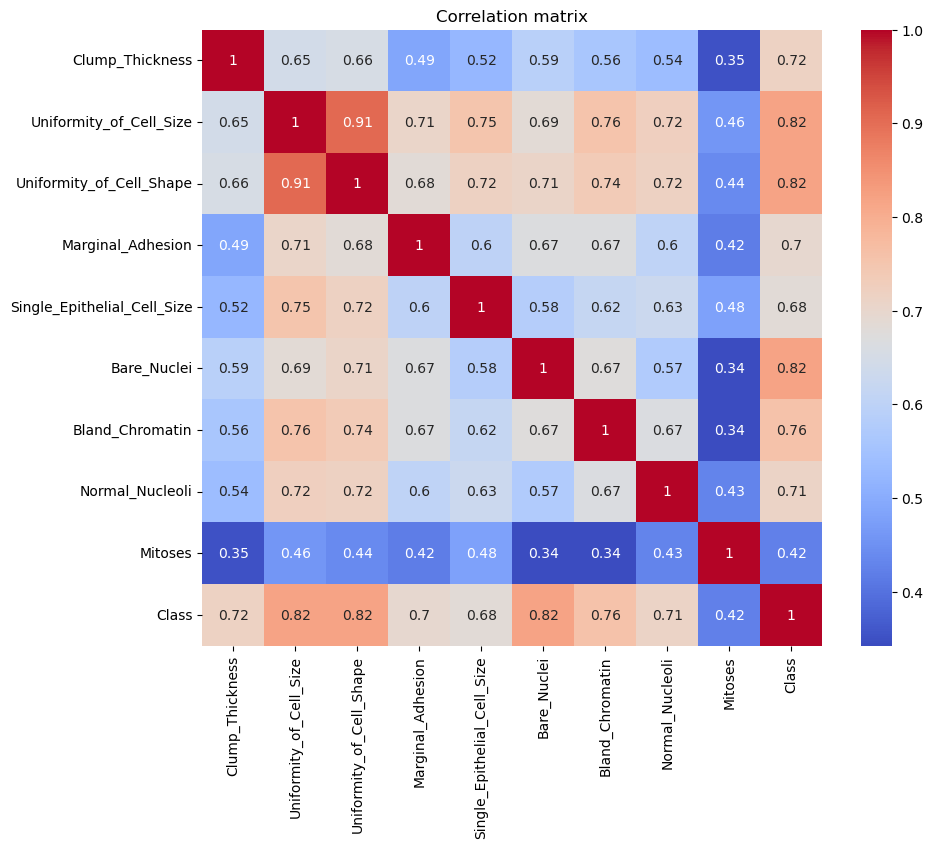

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

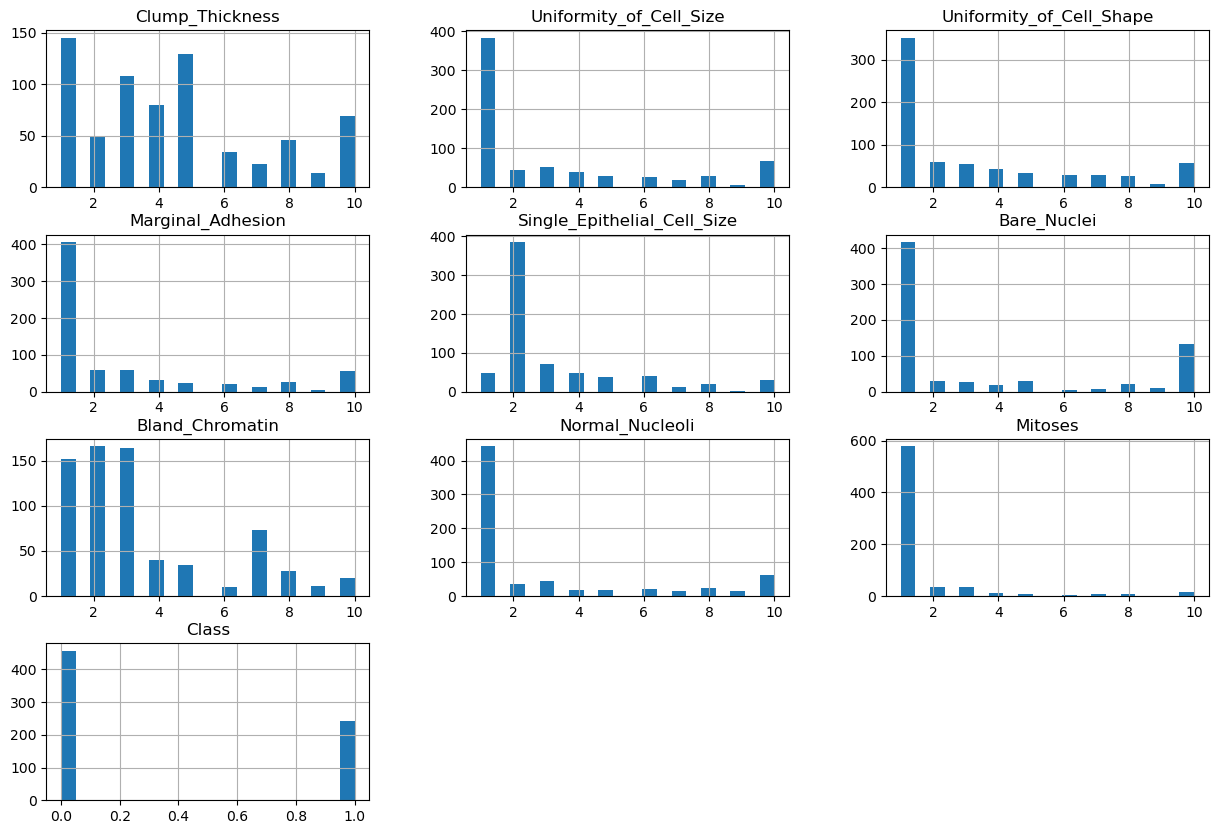

In [16]:
# Distribution of features
df.hist(bins=20, figsize=(15, 10))
plt.show()

### Feature Engineering

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only features by removing 'Class' column
features = df.drop(['Class'], axis=1)

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# A new DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

# Adding the 'Class' column
normalized_df['Class'] = df['Class']

# Displays
print(normalized_df.head())


   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0         0.444444                 0.333333                  0.333333   
1         0.222222                 0.000000                  0.000000   
2         0.555556                 0.777778                  0.777778   
3         0.333333                 0.000000                  0.000000   
4         0.777778                 1.000000                  1.000000   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0           0.444444                     0.666667     1.000000   
1           0.000000                     0.111111     0.111111   
2           0.000000                     0.222222     0.333333   
3           0.222222                     0.111111     0.000000   
4           0.777778                     0.666667     1.000000   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0         0.222222         0.111111      0.0      0  
1         0.222222         0.000000      0.0      0  
2 

### Model Selection and Evaluation

In [18]:
from sklearn.model_selection import train_test_split

# Separating features and target variable
X = normalized_df.drop(['Class'], axis=1)
y = normalized_df['Class']

# Separating data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (558, 9)
Test set size: (140, 9)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Trains the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Make predictions on test data
y_pred = rf_model.predict(X_test)

# Calculating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9785714285714285


In [21]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.94      1.00      0.97        51

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



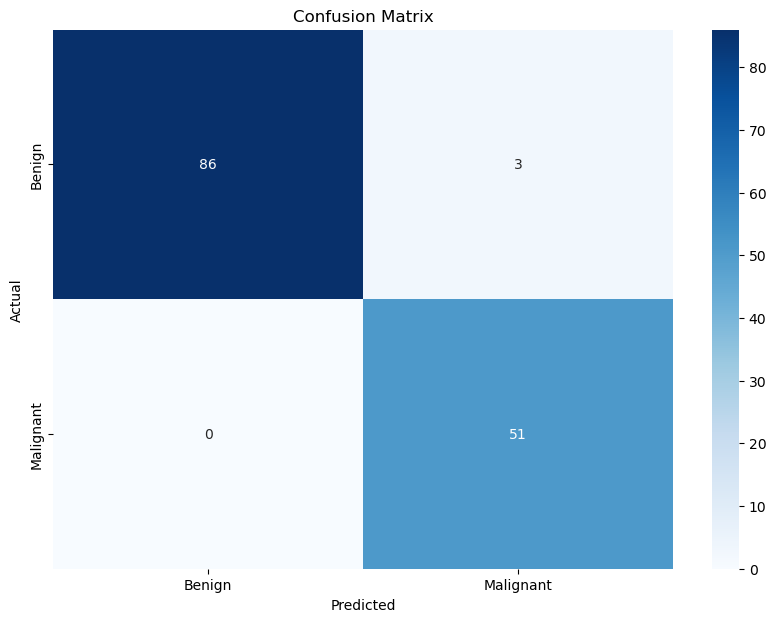

In [22]:
# Creates and visualizes Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Obtaining feature importances
feature_importances = rf_model.feature_importances_

# Prints feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

                       Feature  Importance
1      Uniformity_of_Cell_Size    0.313080
2     Uniformity_of_Cell_Shape    0.214581
5                  Bare_Nuclei    0.168433
6              Bland_Chromatin    0.096459
7              Normal_Nucleoli    0.091639
0              Clump_Thickness    0.056411
4  Single_Epithelial_Cell_Size    0.032409
3            Marginal_Adhesion    0.020830
8                      Mitoses    0.006157


In [24]:
# Selects features with importance above 5%
selected_features = importances_df[importances_df['Importance'] > 0.05]['Feature']
print(f"Selected Features: {selected_features.tolist()}")

Selected Features: ['Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Clump_Thickness']


In [25]:
# Creates a new dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Trains the new Random Forest model with selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluating the model's performance
y_pred_selected = rf_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy (Selected Features): {accuracy_selected}")

Accuracy (Selected Features): 0.9785714285714285


In [26]:
# Classification report
print(classification_report(y_test, y_pred_selected))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.94      1.00      0.97        51

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



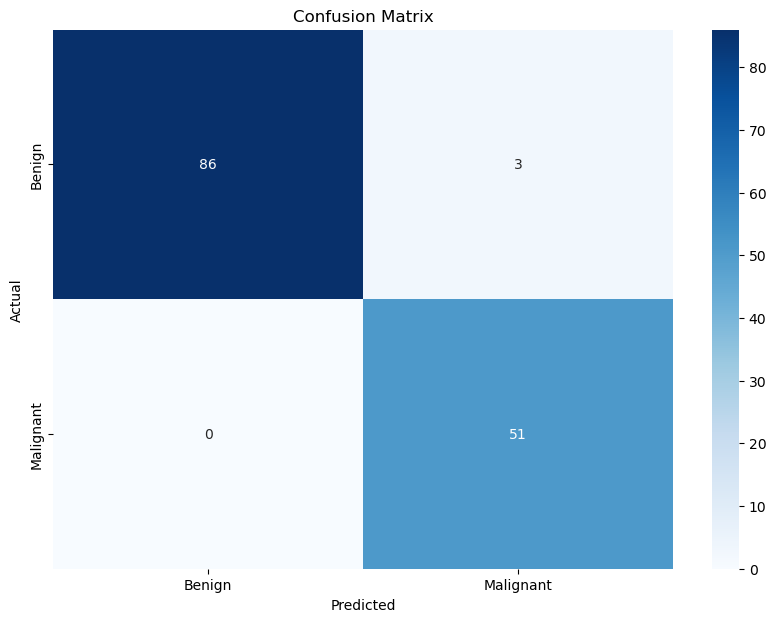

In [27]:
# Confusion matrix
cm_selected = confusion_matrix(y_test, y_pred_selected)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_selected, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()